# AM2061 Algorithm 3-2
## Partial Pivoting

The Method of Partial Pivoting is an extension to the Method of Gaussian Elimination which was explained in Algorithm 3.1.

A brief explanation is as follows:

* Assuming the reader knows of the Method of Gaussian Elimination:
  * Simply find which row has the largest pivot (largest value in first column)
  * Now use this as $E_1$ to complete the Method of Gaussian Elimination

The following is the pseudocode provided:
    
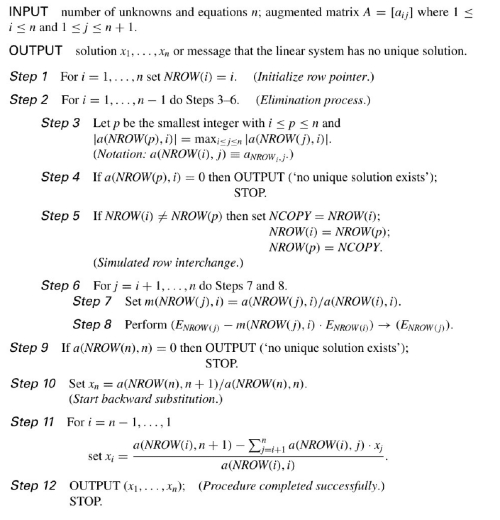

Let us now create this in Python.

First we must define a matrix set of linear equations, for simplicity I will use what was given in L09.

\begin{bmatrix}
0.003 & 59.14 & 59.17 \\
5.291 & -6.13 & 46.78 \\
\end{bmatrix}

Further note that the pseudocode makes use of a "row pointer" $NROW$. This was not used here as it is unnecessary.

In [12]:
import numpy as np

# Note that pseudocode starts indexing at 1, so n+1 is total length
a = np.array([[0.003, 59.14, 59.17], 
              [5.291, -6.13, 46.78]])

Now let us define the algorithm, we only need to pass in the augmented matrix.

Note that there are comments intended to help understanding, and be sure to refer to the pseudocode if stuck!

In [13]:
def PartialPivoting(a):
    A = np.copy(a) # have to use this whenever wanting to reassign another part of a numpy array
    n = len(A[0]) - 2 # n + 1 is last usable index
    
    # Step 2
    for i in range(0, n):
        # Step 3
        p = i
        # only different part to Gaussian Elimination
        while abs(A[p][i]) != np.max(np.abs(A.copy()), axis = 0)[i]: # find max of A in that column i
            p += 1
            
        # Step 4
        if A[p][i] == 0:
            print("No unique solution exists.")
            return
        
        # Step 5
        if p != i:
            # need copy here as we will change A[p] after this and use tempEp
            tempEp = np.copy(A[p])
            # need copy here as we will change A[i] after this and use A[p]
            A[p] = np.copy(A[i])
            # dont need copy as we will no longer use tempEp
            A[i] = tempEp

        # Step 6
        for j in range(i + 1, n + 1):
            # Step 7
            # ratio to see how much need to set first index to 0
            m = np.copy(A[j][i]) / np.copy(A[i][i])
            
            # Step 8
            # should hopefully get 0's on bottomleft diagonal when done
            A[j] = np.copy(A[j]) - m * np.copy(A[i])

    # Step 5
    if A[n][n] == 0:
        print("No unique solution exists.")
        return
    
    # Step 6
    x = [0 for i in range(n + 1)] # list of solutions
    x[n] = np.copy(A[n][n + 1]) / np.copy(A[n][n]) # last index in A, solve with final b
    
    # Step 7
    for i in range(n, -1, -1): # backwards range, starts at n, finishes at 0
        summation = 0
        for j in range(i + 1, n + 1): # for loop to sum these elements
            summation += np.copy(A[i][j]) * x[j] # dont need copy for a python list
            
        x[i] = (np.copy(A[i][n + 1]) - summation) / np.copy(A[i][i])
        
    # Step 8
    print("Procedure completed successfully.")
    print(x)
    
    return x

We can now test this algorithm for a set of solutions, which will be returned as a list:

In [14]:
PartialPivoting(a)

Procedure completed successfully.
[10.0, 1.0]


[10.0, 1.0]